<a href="https://colab.research.google.com/github/gbrlcapp/atvs-cd25/blob/main/PCA_e_t_SNE_Dataset_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

iris = load_iris()

df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

print(df_iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0         0  

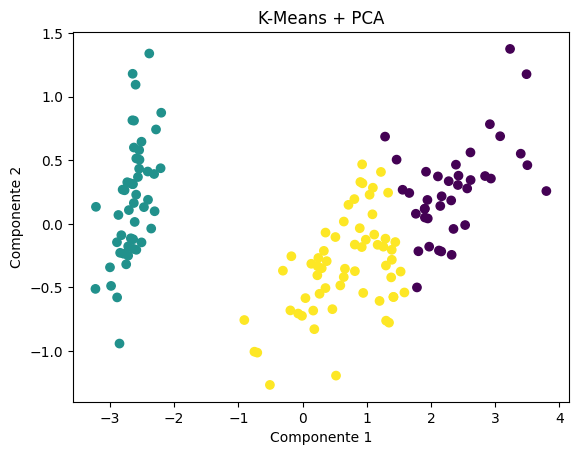

In [9]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

X = iris.data
y = iris.target

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_pca)
plt.title("K-Means + PCA")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.show()

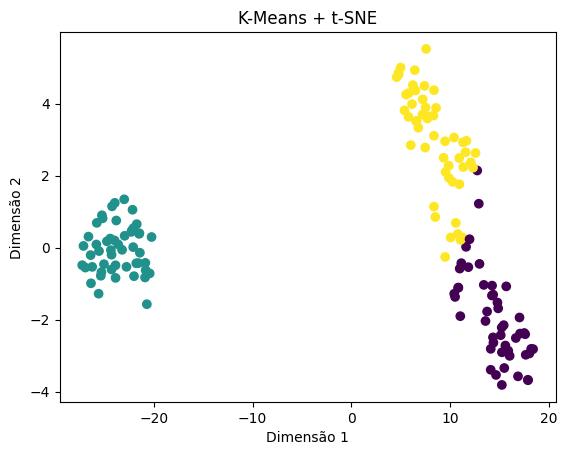

In [10]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

kmeans_tsne = KMeans(n_clusters=3, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(X_tsne)

plt.figure()
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters_tsne)
plt.title("K-Means + t-SNE")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.show()

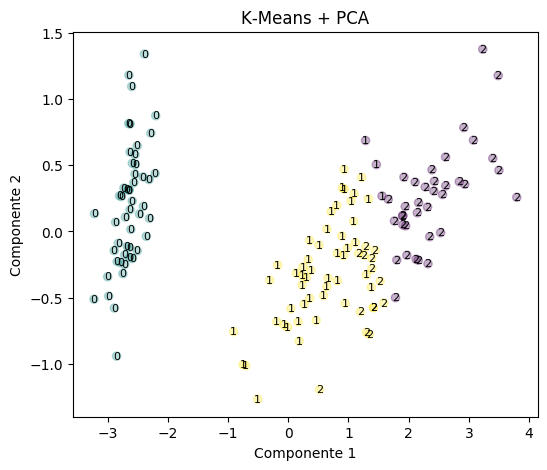

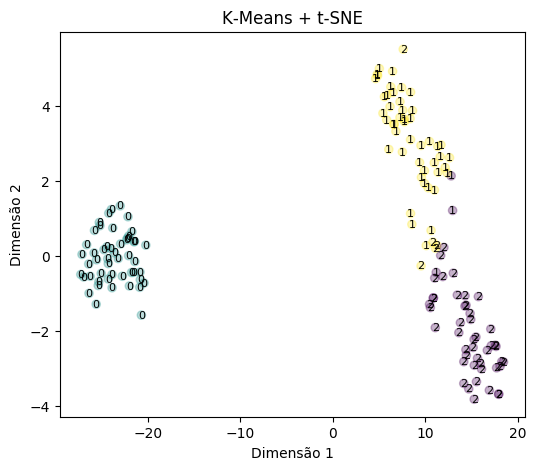

In [16]:
def scatter_with_labels(X2d, clusters, targets, title, xlabel, ylabel):
    plt.figure(figsize=(6,5))
    plt.scatter(X2d[:,0], X2d[:,1], c=clusters, alpha=0.3)
    for i, t in enumerate(targets):
        plt.text(X2d[i,0], X2d[i,1],
                 str(t),
                 fontsize=8,
                 ha='center',
                 va='center')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# PCA + K‑Means
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

scatter_with_labels(
    X2d=X_pca,
    clusters=clusters_pca,
    targets=y,
    title="K‑Means + PCA",
    xlabel="Componente 1",
    ylabel="Componente 2"
)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

kmeans_tsne = KMeans(n_clusters=3, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(X_tsne)

scatter_with_labels(
    X2d=X_tsne,
    clusters=clusters_tsne,
    targets=y,
    title="K‑Means + t‑SNE",
    xlabel="Dimensão 1",
    ylabel="Dimensão 2"
)


## **Comparando a clusterização através dos dois algoritmos com a variável "target", que possui valores de 0, 1 e 2 e representam a espécie da planta, podemos observar que ambos tiveram resultados satisfatórios em classificá-los, porém o t-SNE se mostrou ligeiramente melhor, pois o PCA acabou por confundir a classificação entre as espécies 1 e 2, enquanto no t-SNE isso ocorreu com frequência bem menor.**